In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def func(y, x):
    gamma = 0.1
    return np.array([y[1], -(gamma**2/2*x*y[1]+3*y[0]**2*y[1]**2)/y[0]**3])

def rk4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i])
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2.)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2.)
        k4 = f(y[i] + k3 * h, t[i] + h)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y




In [76]:
x = np.linspace(0,1,200)

# alpha = -0.308 #when gamma == 1
alpha = -0.25
y0 = np.array([1, alpha])
solution = rk4(func, y0, x)

0.20779003420399134

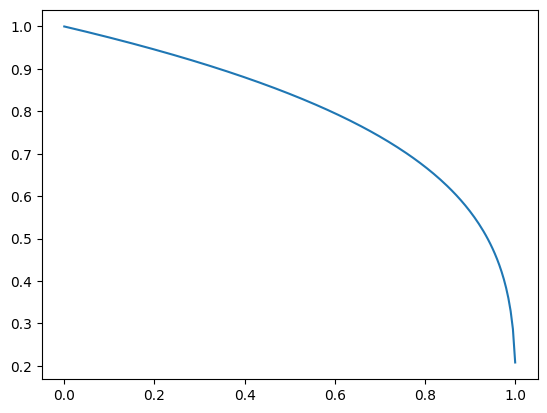

In [77]:
plt.plot(x,solution[:,0])
# plt.plot(solution[:,1])
solution[-1,0]